In [63]:
import torch
from torch import nn

torch.__version__

'2.3.1+cu121'

In [64]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [65]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir() :
  print(f"{image_path} directory exists  ")
else :
  print(f"{image_path} does not exists , creating new ")
  image_path.mkdir(parents= True , exist_ok= True)
with open(data_path / "pizza_steak_sushi.zip" , "wb") as f :
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("downloading ")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip" , "r") as zip_ref :
  print("Unzipping data set")

  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists  
downloading 
Unzipping data set


In [66]:
import os
def walk_through_dir(dir_path) :
  for dir_path, dirnames , filenames in os.walk(dir_path) :
    print(f"There are {len(dirnames)} dirs || {len(filenames)} images in {dir_path}")

walk_through_dir(image_path)

There are 2 dirs || 0 images in data/pizza_steak_sushi
There are 3 dirs || 0 images in data/pizza_steak_sushi/train
There are 0 dirs || 78 images in data/pizza_steak_sushi/train/pizza
There are 0 dirs || 75 images in data/pizza_steak_sushi/train/steak
There are 0 dirs || 72 images in data/pizza_steak_sushi/train/sushi
There are 3 dirs || 0 images in data/pizza_steak_sushi/test
There are 0 dirs || 25 images in data/pizza_steak_sushi/test/pizza
There are 0 dirs || 19 images in data/pizza_steak_sushi/test/steak
There are 0 dirs || 31 images in data/pizza_steak_sushi/test/sushi


In [67]:
train_dir = image_path / "train"
test_dir = image_path / "test"

print(train_dir)
print(test_dir)

data/pizza_steak_sushi/train
data/pizza_steak_sushi/test


Random image path : data/pizza_steak_sushi/train/pizza/3018077.jpg 
Image class :  pizza
Image size : 512 || 512


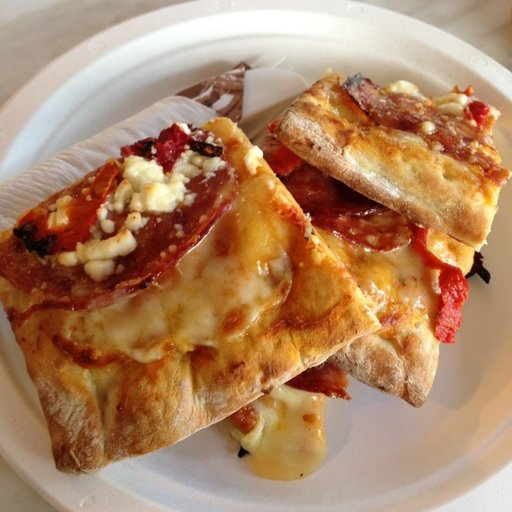

In [68]:
# Visualize the image

import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

# image_path_list

random_image_path = random.choice(image_path_list)
random_image_path

random_image_class = random_image_path.parent.stem


img = Image.open(random_image_path)

print(f"Random image path : {random_image_path} " )
print(f"Image class :  {random_image_class}")
print(f"Image size : {img.height} || {img.width}")
img

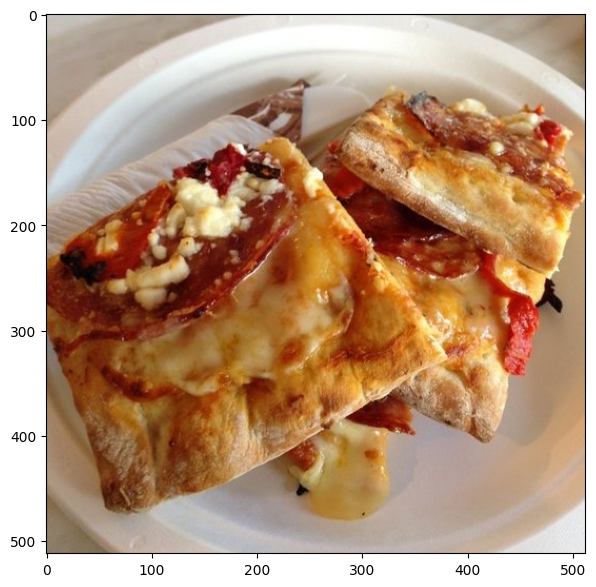

In [69]:
## matplotlib
import numpy as np
import matplotlib.pyplot as plt

img_array = np.array(img)

plt.figure(figsize =(10, 7))
plt.imshow(img_array)


In [70]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

In [71]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)) ,
    transforms.RandomHorizontalFlip(p =0.5),
    transforms.ToTensor()
])

In [72]:
data_transform(img).shape

torch.Size([3, 64, 64])

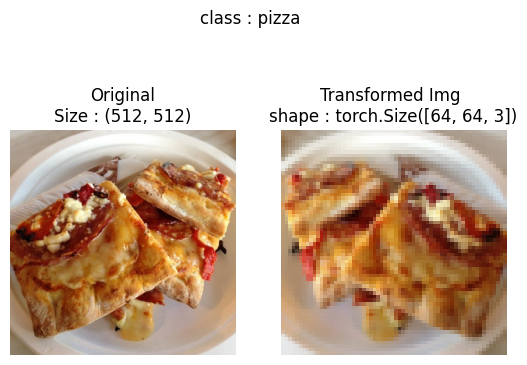

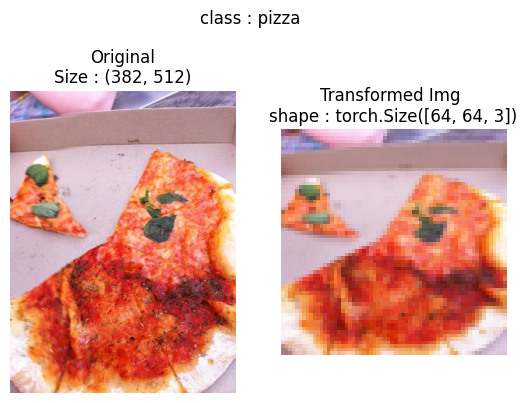

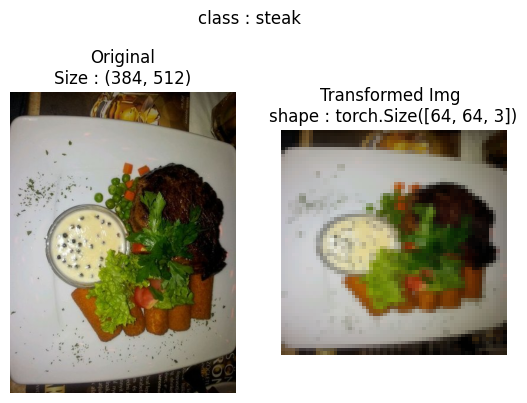

In [73]:
def plot_transformed_image(image_paths , transform , n = 3 , seed = 42 ) :

  if seed :
    random.seed(42)
  random_image_paths = random.sample(image_paths , k = n )

  for image_path in random_image_paths :
    with Image.open(image_path) as f :
      fig , ax = plt.subplots(nrows = 1 , ncols = 2 )
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize : {f.size}")
      ax[0].axis(False)


      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed Img \nshape : {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"class : {image_path.parent.stem}")

plot_transformed_image(image_paths=image_path_list ,
                       transform = data_transform ,
                       n = 3 ,
                       seed = 42
                       )

In [74]:
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir ,
                                  transform = data_transform ,
                                  target_transform = None )

test_data = datasets.ImageFolder(root = test_dir ,
                                transform = data_transform)

train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [75]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [76]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [77]:
train_data[0][0]

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [78]:
import os
os.cpu_count()

2

In [79]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1

train_dataloader = DataLoader(dataset = train_data ,
                              batch_size = BATCH_SIZE ,
                              num_workers=1 ,
                              shuffle= True )

test_dataloader = DataLoader(dataset= test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1 ,
                             shuffle = False )

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dd8458ab070>,
 <torch.utils.data.dataloader.DataLoader at 0x7dd8458ab190>)

In [80]:
# import image using custom dataset

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple , Dict , List




In [81]:
# Get class Names

target_directory = train_dir
print(f"Target dir : {target_directory}")

class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

class_name_found

Target dir : data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [82]:
def find_classes(directory) :
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes :
    raise FileNotFoundError(f"Couldn't find classes in {directory}")
  class_to_idx = {class_name : i for i , class_name in enumerate(classes)}

  return classes , class_to_idx

In [83]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [84]:
# Custom datasets

from torch.utils.data import Dataset

class ImageFolderCustom(Dataset) :
  def __init__(self , tar_dir , transform = None ) :
    self.paths = list(pathlib.Path(tar_dir).glob("*/*.jpg"))
    self.transform = transform

    self.classes , self.class_to_idx = find_classes(tar_dir)

  def load_image(self, index ) :
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) :
    return len(self.paths)

  def __getitem__(self, index ) :
    img = self.load_image(index)

    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform :
      return self.transform(img) , class_idx
    else :
      return img , class_idx




In [85]:
train_transform = transforms.Compose([
    transforms.Resize((64,64)) ,
    transforms.RandomHorizontalFlip(p = 0.5) ,
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64,64)) ,
    transforms.ToTensor()
])

In [86]:
train_data_custom = ImageFolderCustom(tar_dir=train_dir,
                                      transform=train_transform)
test_data_custom = ImageFolderCustom(tar_dir=test_dir,
                                     transform=test_transform )
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7dd83e30e110>,
 <__main__.ImageFolderCustom at 0x7dd845a40370>)

In [87]:
len(train_data_custom) , len(test_data_custom)

(225, 75)

In [88]:
## display random images


def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):


    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")


    if seed:
        random.seed(seed)


    random_samples_idx = random.sample(range(len(dataset)), k=n)
    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

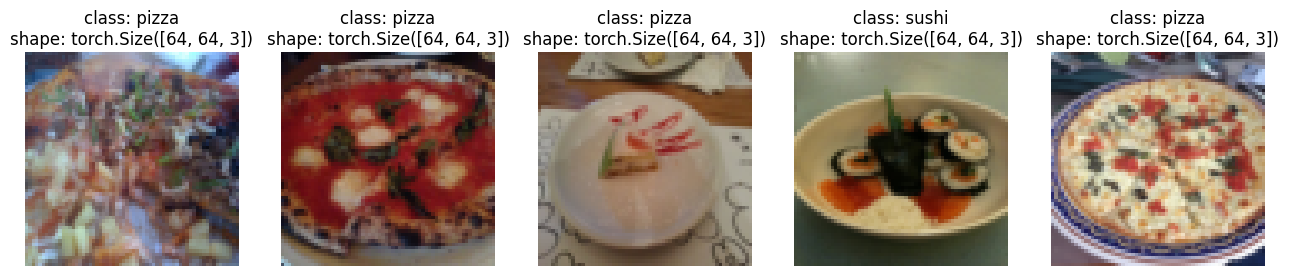

In [89]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_name_found,
                      seed=None)

In [90]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=1,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7dd830e8fdf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dd830e8de10>)

In [91]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [92]:
## Data augmentation

from torchvision import transforms

train_transforms  = transforms.Compose([
                      transforms.Resize((224,224)) ,
                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                      transforms.ToTensor()
])

test_transforms  = transforms.Compose([
                      transforms.Resize((224,224)) ,
                      transforms.ToTensor()
])





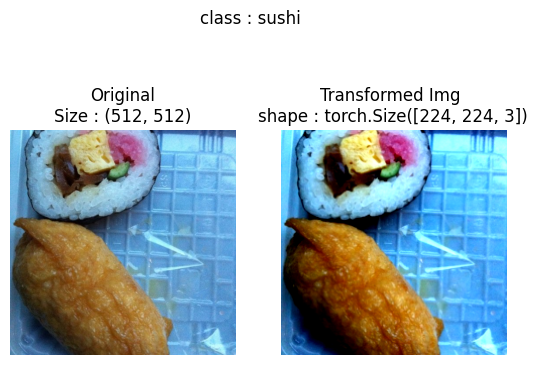

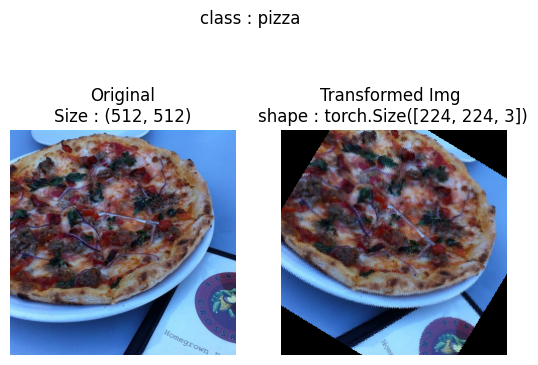

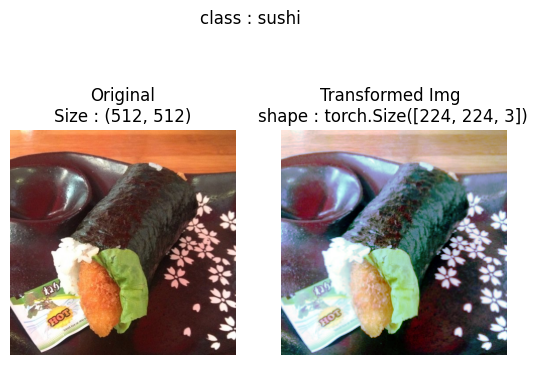

In [93]:

image_path_list = list(image_path.glob("*/*/*.jpg"))


plot_transformed_image(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

In [94]:
# simple transform

simple_transform = transforms.Compose([
    transforms.Resize((64,64)) ,
    transforms.ToTensor(),
])

In [95]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root = train_dir , transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir , transform= simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32

NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(train_data_simple ,
                                     batch_size = BATCH_SIZE ,
                                     shuffle  = None ,
                                     num_workers = NUM_WORKERS )

test_dataloader_simple = DataLoader(test_data_simple ,
                                    batch_size = BATCH_SIZE ,
                                    num_workers= NUM_WORKERS )




In [96]:
## TINY VGG

class TinyVGG(nn.Module) :
  def __init__(self , input_shape , hidden_units , output_shape ) :
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape ,
                    out_channels = hidden_units ,
                    kernel_size = 3 ,
                    stride = 1 ,
                    padding = 1 ),
        nn.ReLU(),
          nn.Conv2d(in_channels = hidden_units ,
                out_channels = hidden_units ,
                kernel_size = 3 ,
                stride = 1 ,
                padding = 1 ) ,
        nn.ReLU() ,
        nn.MaxPool2d(kernel_size = 2 , stride = 2 )
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units ,
                    out_channels = hidden_units ,
                    kernel_size = 3 ,
                    padding = 1 ),
        nn.ReLU(),
          nn.Conv2d(in_channels = hidden_units ,
                out_channels = hidden_units ,
                kernel_size = 3 ,
                stride = 1 ,
                padding = 1 ) ,
        nn.ReLU() ,
        nn.MaxPool2d(kernel_size = 2 )
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*16*16 , out_features = output_shape )
    )

  def forward(self ,x ) :
     return self.classifier(self.conv_block2(self.conv_block1(x)))

torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3 ,
                  hidden_units = 10 ,
                  output_shape = len(train_data.classes)).to(device)

model_0


TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [97]:
img_batch , label_batch = next(iter(train_dataloader_simple))

img_single , label_single = img_batch[0].unsqueeze(dim=0) , label_batch[0]

print(f"single iamge shaep : {img_single.shape} " )

model_0.eval()

with torch.inference_mode() :
  pred = model_0(img_single.to(device))

print(f"output logits : {pred}")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

single iamge shaep : torch.Size([1, 3, 64, 64]) 
output logits : tensor([[0.0602, 0.0636, 0.0365]])
Output prediction probabilities:
tensor([[0.3356, 0.3367, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
0


In [98]:
## Torch info
import  torchinfo

from torchinfo import summary

summary(model_0 , input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [99]:
## train and test loop

def train_step(model , dataloader , loss_fn , optimizer ) :
  model.train()

  train_loss , train_acc = 0 , 0

  for batch , (X, y ) in enumerate(dataloader) :
    X , y = X.to(device) , y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y )
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred , dim=1 ) , dim =1)
    train_acc += (y_pred_class == y ).sum().item() / len(y_pred)

  train_loss  = train_loss / len(dataloader)
  train_acc =  train_acc / len(dataloader)

  return train_loss , train_acc


def test_step(model , dataloader , loss_fn ) :
  model.eval()

  test_loss , test_acc = 0 , 0

  with torch.inference_mode() :
    for batch , (X, y) in enumerate(dataloader) :
      X ,y = X.to(device) , y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits , y )
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim = 1)
      test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

  test_loss += test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss , test_acc


In [100]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

In [101]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)


NUM_EPOCHS = 5


model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)


from timeit import default_timer as timer
start_time = timer()


model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)


end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2886 | train_acc: 0.2773 | test_loss: 4.7999 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.1058 | train_acc: 0.3047 | test_loss: 4.5149 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0914 | train_acc: 0.3047 | test_loss: 4.3789 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.0895 | train_acc: 0.5273 | test_loss: 4.3057 | test_acc: 0.5417
Epoch: 5 | train_loss: 1.0919 | train_acc: 0.4023 | test_loss: 4.2649 | test_acc: 0.5417
Total training time: 10.318 seconds


In [102]:
def plot_loss_curves(results: Dict[str, List[float]]):

    loss = results['train_loss']
    test_loss = results['test_loss']


    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))


    plt.figure(figsize=(15, 7))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

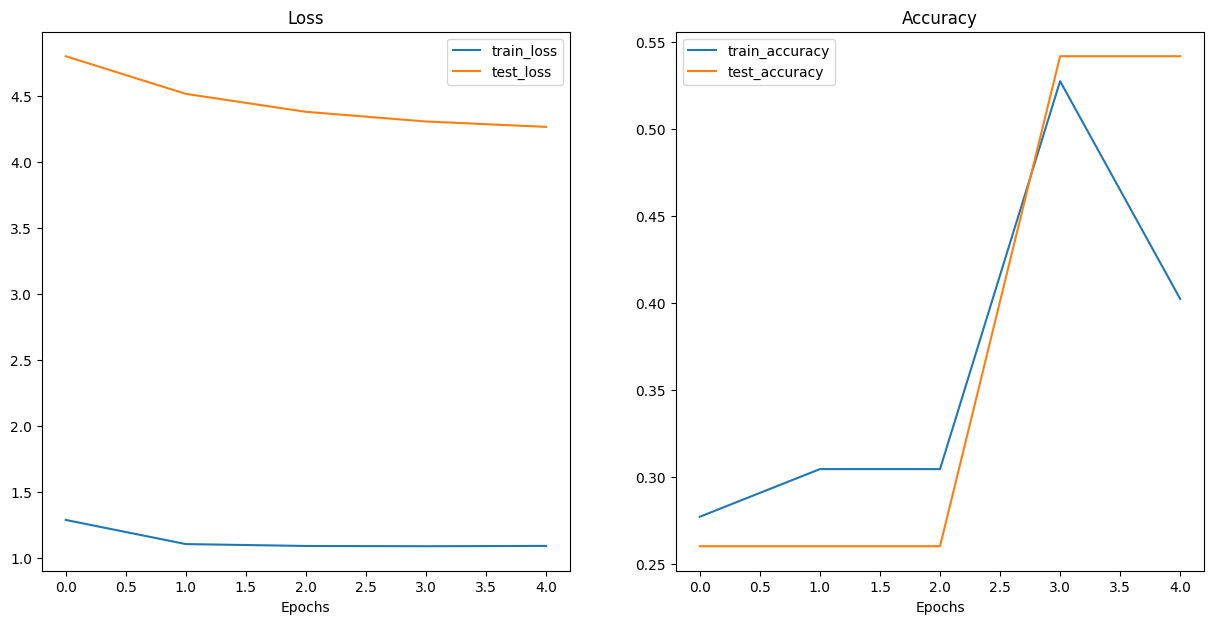

In [103]:
plot_loss_curves(model_0_results)

In [104]:
## VGG model 2


train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [105]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [106]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dd83105aec0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dd8458ab190>)

In [107]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [108]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 4.4249 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 4.5549 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 4.6782 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 4.6501 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 4.5929 | test_acc: 0.2604
Total training time: 11.125 seconds


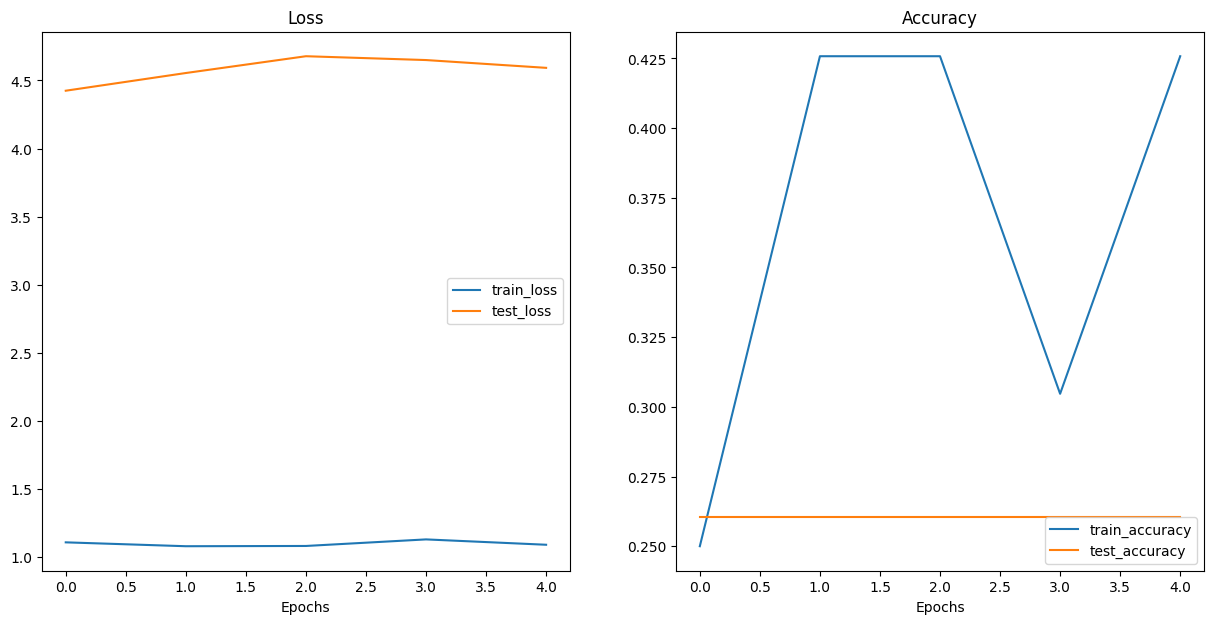

In [109]:
plot_loss_curves(model_1_results)

In [110]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.288608,0.277344,4.799923,0.260417
1,1.105760,0.304688,4.514860,0.260417
2,1.091421,0.304688,4.378910,0.260417
3,1.089540,0.527344,4.305689,0.541667
4,1.091908,0.402344,4.264863,0.541667


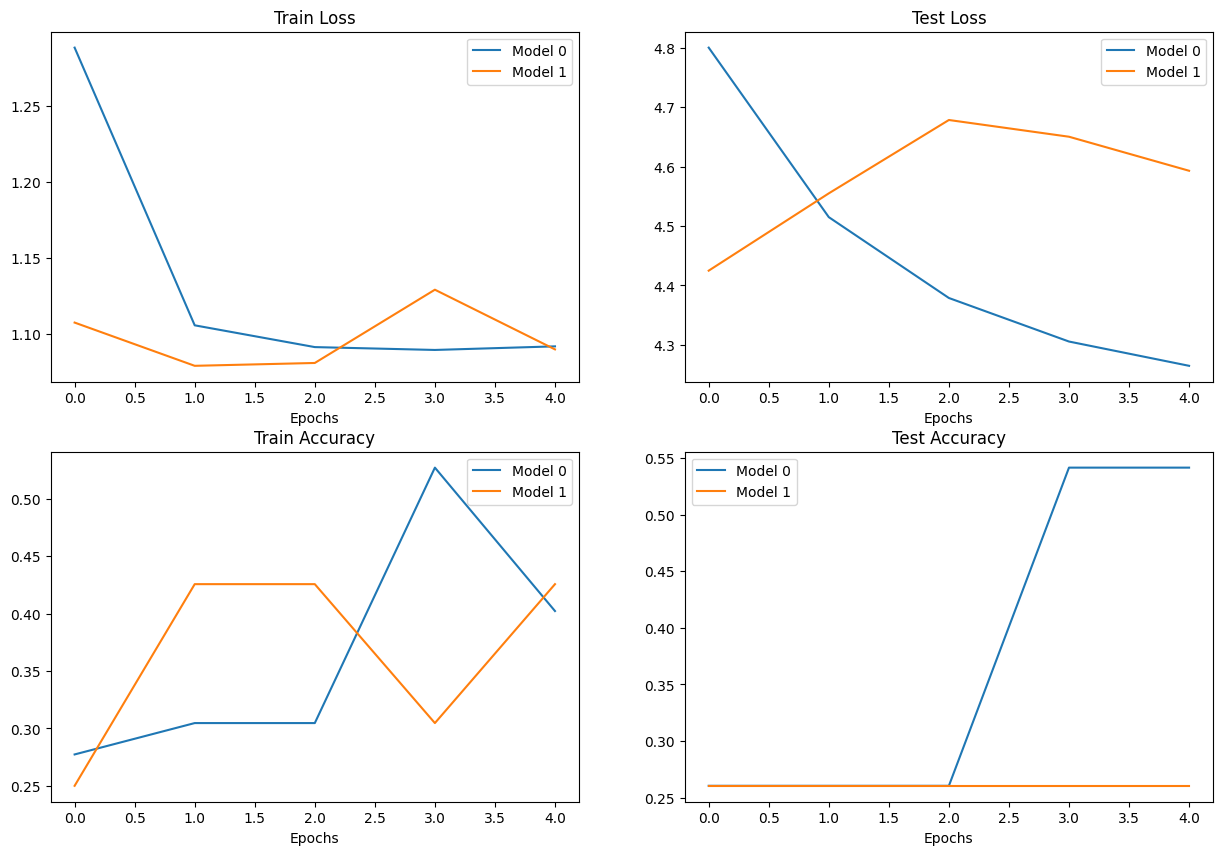

In [111]:
# Setup a plot
plt.figure(figsize=(15, 10))


epochs = range(len(model_0_df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [123]:

import requests

custom_image_path = data_path / "Pizza_boy.jpg" ## uploaded manually

if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:

        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

data/Pizza_boy.jpg already exists, skipping download.


In [125]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[ 1,  1,  1,  ...,  4,  4,  4],
         [ 1,  1,  1,  ...,  4,  4,  4],
         [ 1,  1,  1,  ...,  4,  4,  4],
         ...,
         [ 3,  3,  3,  ...,  2,  2,  2],
         [ 3,  3,  3,  ...,  2,  2,  2],
         [ 3,  3,  3,  ...,  2,  2,  2]],

        [[ 0,  0,  0,  ...,  2,  2,  2],
         [ 0,  0,  0,  ...,  2,  2,  2],
         [ 0,  0,  0,  ...,  2,  2,  2],
         ...,
         [11, 11, 11,  ...,  0,  0,  0],
         [11, 11, 11,  ...,  0,  0,  0],
         [11, 11, 11,  ...,  0,  0,  0]],

        [[ 2,  2,  2,  ...,  5,  5,  5],
         [ 2,  2,  2,  ...,  5,  5,  5],
         [ 2,  2,  2,  ...,  5,  5,  5],
         ...,
         [13, 13, 13,  ...,  3,  3,  3],
         [13, 13, 13,  ...,  3,  3,  3],
         [13, 13, 13,  ...,  3,  3,  3]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 1960, 2940])

Custom image dtype: torch.uint8


In [126]:

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image = custom_image / 255.

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.0039, 0.0039, 0.0039,  ..., 0.0157, 0.0157, 0.0157],
         [0.0039, 0.0039, 0.0039,  ..., 0.0157, 0.0157, 0.0157],
         [0.0039, 0.0039, 0.0039,  ..., 0.0157, 0.0157, 0.0157],
         ...,
         [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
         [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
         [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0078],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0078],
         [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0078],
         ...,
         [0.0431, 0.0431, 0.0431,  ..., 0.0000, 0.0000, 0.0000],
         [0.0431, 0.0431, 0.0431,  ..., 0.0000, 0.0000, 0.0000],
         [0.0431, 0.0431, 0.0431,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0196, 0.0196, 0.0196],
         [0.0078, 0.0078, 0.0078,  ..., 0.0196, 0.0196, 0.0196],
         [0.0078, 0.0078, 0.0078,  ..

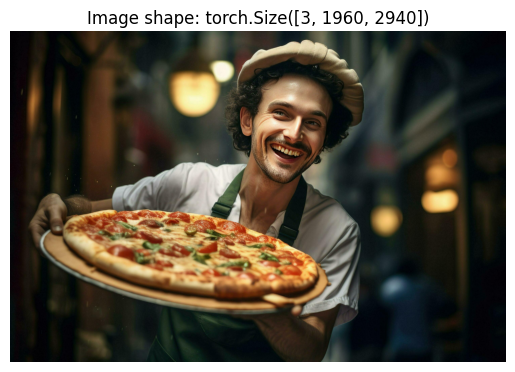

In [127]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [128]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 1960, 2940])
New shape: torch.Size([3, 64, 64])


In [129]:
model_1.eval()
with torch.inference_mode():
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [130]:
custom_image_pred

tensor([[ 0.1140,  0.0342, -0.1371]])

In [131]:

print(f"Prediction logits: {custom_image_pred}")

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.1140,  0.0342, -0.1371]])
Prediction probabilities: tensor([[0.3702, 0.3418, 0.2880]])
Prediction label: tensor([0])


In [132]:
# Find the predicted label
custom_image_pred_class = class_name_found[custom_image_pred_label.cpu()]
custom_image_pred_class

'pizza'

In [133]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):

    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    target_image = target_image / 255.

    if transform:
        target_image = transform(target_image)


    model.eval()
    with torch.inference_mode():

        target_image = target_image.unsqueeze(dim=0)

        target_image_pred = model(target_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    plt.imshow(target_image.squeeze().permute(1, 2, 0))
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

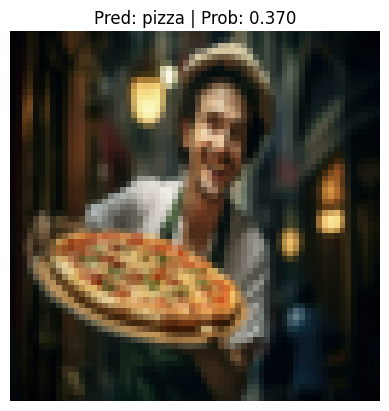

In [134]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_name_found,
                    transform=custom_image_transform,
                    device=device)